### Import libaries and etc.

In [1]:

import pychrono.core as chrono
import pychrono.irrlicht as chrirr
import numpy as np
import matplotlib.pyplot as plt
import AcrobotSystem as acr


### Parameters

In [2]:
xz_rod = 0.05
len_rod_1 = 0.3
len_rod_2 = 0.6
density = 1000 

xyz_cube = 0.1

## Init chrono system

In [3]:

#chrono.SetChronoDataPath('D:/Programms/anaconda3/pkgs/pychrono-7.0.0-py39_0/Library/data/')
system = chrono.ChSystemNSC()


chrono.ChCollisionModel.SetDefaultSuggestedEnvelope(0.01)
chrono.ChCollisionModel.SetDefaultSuggestedMargin(0.01)

body_material = chrono.ChMaterialSurfaceNSC()
body_material.SetFriction(0.6)
body_material.SetDampingF(0.4)
body_material.SetCompliance(10**(-7))
body_material.SetComplianceT(10**(-7))


### Simulate

In [4]:
acrobot = acr.AcrobotSystem(system,len_rod_1,len_rod_2, body_material)

acrobot.AddJoints()

data_result = acrobot.Simulate(5,0.01)


### Plot graphics

Text(0, 0.5, 'dq1, dq2, [rad/s]')

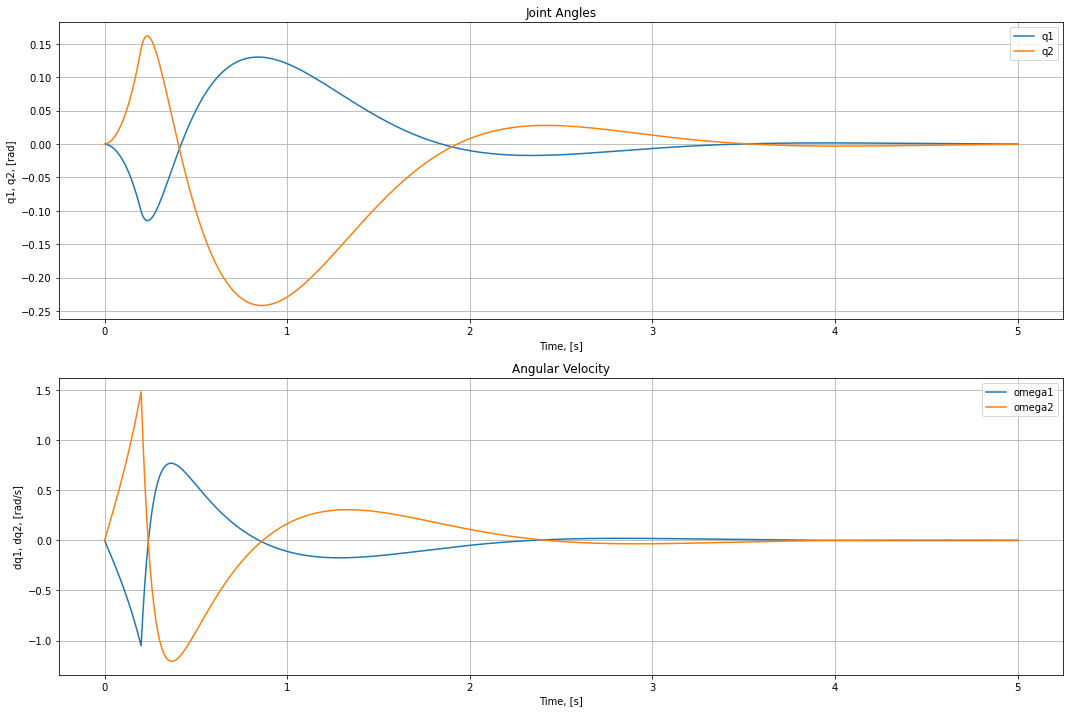

In [5]:
from cProfile import label


plt.figure(figsize=(18,12))

plt.subplot(2,1,1)
plt.title("Joint Angles")
plt.plot(data_result['time'],data_result['angle_1'],data_result['time'],data_result['angle_2'])
plt.legend(["q1", "q2"])
plt.grid(True)
plt.xlabel("Time, [s]")
plt.ylabel("q1, q2, [rad]")
plt.subplot(2,1,2)
plt.title("Angular Velocity")
plt.plot(data_result['time'],data_result['omega_1'],data_result['time'],data_result['omega_2'])
plt.legend(["omega1","omega2"])
plt.grid(True)
plt.xlabel("Time, [s]")
plt.ylabel("dq1, dq2, [rad/s]")